In [2]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
import yfinance as yf
import numpy as np


In [3]:
SP500_data=yf.download("^GSPC",start="2018-01-01", end="2022-09-30",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [4]:
bitcoin_data = yf.download("BTC-USD", start="2018-01-01", end="2022-09-30",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [5]:
ethereum_data=yf.download("ETH-USD", start="2018-01-01", end="2022-09-30",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [114]:
litecoin_data=yf.download("LTC-USD", start="2018-01-01", end="2022-09-30",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [115]:
solana_data=yf.download("SOL-USD", start="2018-01-01", end="2022-09-30",interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [116]:
bitcoin_data.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [117]:
bitcoin_data=bitcoin_data.rename(columns={"Close":"BTC"})

In [118]:
solana_data.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [119]:
solana_data=solana_data.rename(columns={"Close":"SOL"})

In [120]:
litecoin_data.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [121]:
litecoin_data=litecoin_data.rename(columns={"Close":"LTC"})

In [122]:
ethereum_data.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True)

In [123]:
ethereum_data=ethereum_data.rename(columns={"Close":"ETH"})

In [ ]:
bitcoin_data.hvplot.line()

In [ ]:
ethereum_data.hvplot.line()

In [ ]:
ETHplot=ethereum_data.hvplot.line(height=500,width=900,legend='top')
BTCplot=bitcoin_data.hvplot.line(height=500,width=900,legend='top')

In [ ]:
ETHplot*BTCplot

In [ ]:
combined_plot=ETHplot*BTCplot

In [124]:
combined_data = pd.concat([bitcoin_data,ethereum_data,solana_data,litecoin_data],axis=1,join="inner")

In [125]:
combined_data

,BTC,ETH,SOL,LTC
Date,,,,
2020-04-10,6865.493164,158.412445,0.951054,42.269814
2020-04-11,6859.083008,158.216019,0.776819,42.319099
2020-04-12,6971.091797,161.142426,0.882507,42.450287
2020-04-13,6845.037598,156.279556,0.777832,41.204342
2020-04-14,6842.427734,157.596390,0.661925,41.053841
...,...,...,...,...
2022-09-26,19222.671875,1335.320190,33.880554,53.432064
2022-09-27,19110.546875,1330.127686,32.750130,52.737259
2022-09-28,19426.720703,1337.410889,33.235439,53.308426


<AxesSubplot:xlabel='Date'>

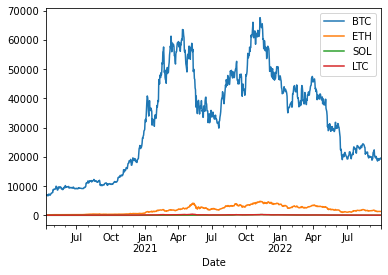

In [126]:
combined_data.plot()

In [127]:
# Calculate the correlation between each coin
correlation = combined_data.corr()
correlation

,BTC,ETH,SOL,LTC
BTC,1.000000,0.877917,0.676238,0.892962
ETH,0.877917,1.000000,0.880701,0.720908
SOL,0.676238,0.880701,1.000000,0.457380
LTC,0.892962,0.720908,0.457380,1.000000


In [128]:
#pct return concat and compare and then std compare

In [146]:
#imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

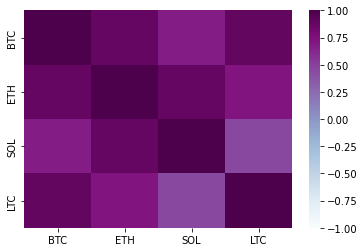

In [147]:
# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="BuPu")

In [148]:
plt.savefig('cryptoheat.png')

<Figure size 432x288 with 0 Axes>

In [132]:
# Calculate daily returns for each portfolio
combined_returns = combined_data.pct_change().dropna()

In [133]:
combined_returns

,BTC,ETH,SOL,LTC
Date,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,0.001166
2020-04-12,0.016330,0.018496,0.136052,0.003100
2020-04-13,-0.018082,-0.030177,-0.118611,-0.029351
2020-04-14,-0.000381,0.008426,-0.149013,-0.003653
2020-04-15,-0.029276,-0.027345,-0.023075,-0.035679
...,...,...,...,...
2022-09-26,0.022368,0.031759,0.047786,0.015201
2022-09-27,-0.005833,-0.003889,-0.033365,-0.013004
2022-09-28,0.016544,0.005476,0.014819,0.010830


In [134]:
port_std=combined_returns.std()

In [135]:
port_std

BTC    0.036663
ETH    0.048908
SOL    0.079940
LTC    0.051831
dtype: float64

<AxesSubplot:>

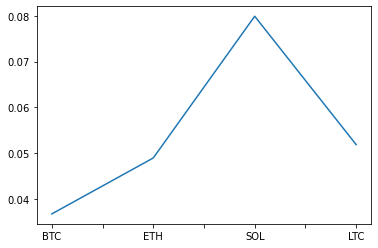

In [136]:
port_std.plot()

In [143]:
# Calculate sharpe ratio
sharpe_ratios = (combined_returns.mean() * 252) / (port_std * np.sqrt(252))
sharpe_ratios.head()

BTC    0.789795
ETH    1.154190
SOL    1.405527
LTC    0.498879
dtype: float64